In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

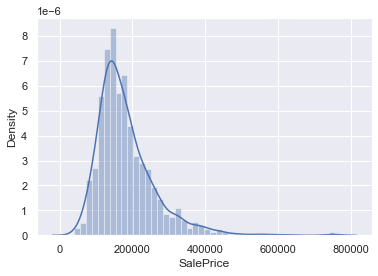

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
numeric_features = X.select_dtypes(include=np.number).columns
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
nan_columns = X_train[numeric_features].columns[X_train[numeric_features].isna().any()].tolist()
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [9]:
for column in nan_columns:
    X_train[column] = X_train[column].replace(np.nan, X_train[column].median())
    X_test[column] = X_test[column].replace(np.nan, X_test[column].median())

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regressions = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}
for model in regressions.values():
    model.fit(X_train[numeric_features], y_train)

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [11]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
from sklearn.metrics import make_scorer, r2_score


def rmse(y, y_pred, **kwargs):
    return np.sqrt(np.mean((y - y_pred) ** 2))
rmse_score = make_scorer(rmse, greater_is_better=False)

In [12]:
for name, model in regressions.items():
    print(f'{name} score={model.score(X_train[numeric_features], y_train)}, r2_score = {r2_score(model.predict(X_train[numeric_features]), y_train)}')

Linear regression score=0.8046129013720409, r2_score = 0.7571663363901132
Ridge score=0.8046112367778868, r2_score = 0.7570714122371559
Lasso score=0.8046128828136784, r2_score = 0.7571574858207825


In [13]:
for name, model in regressions.items():
    print(f'{name}, rmse = {rmse(y_train, model.predict(X_train[numeric_features]))}')

Linear regression, rmse = 35622.27535186687
Ridge, rmse = 35622.427092962935
Lasso, rmse = 35622.27704361389


In [14]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

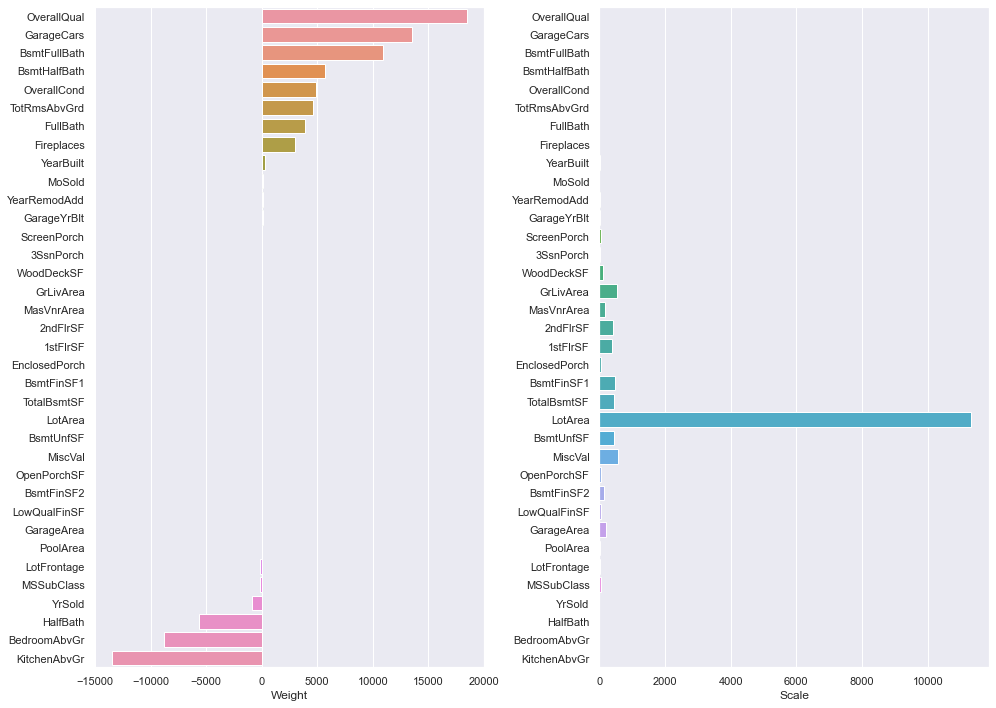

In [15]:
show_weights(numeric_features, regressions['Linear regression'].coef_, X_train[numeric_features].std())

In [16]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scalaer = StandardScaler()
X_train_scaled = standard_scalaer.fit_transform(X_train[numeric_features])

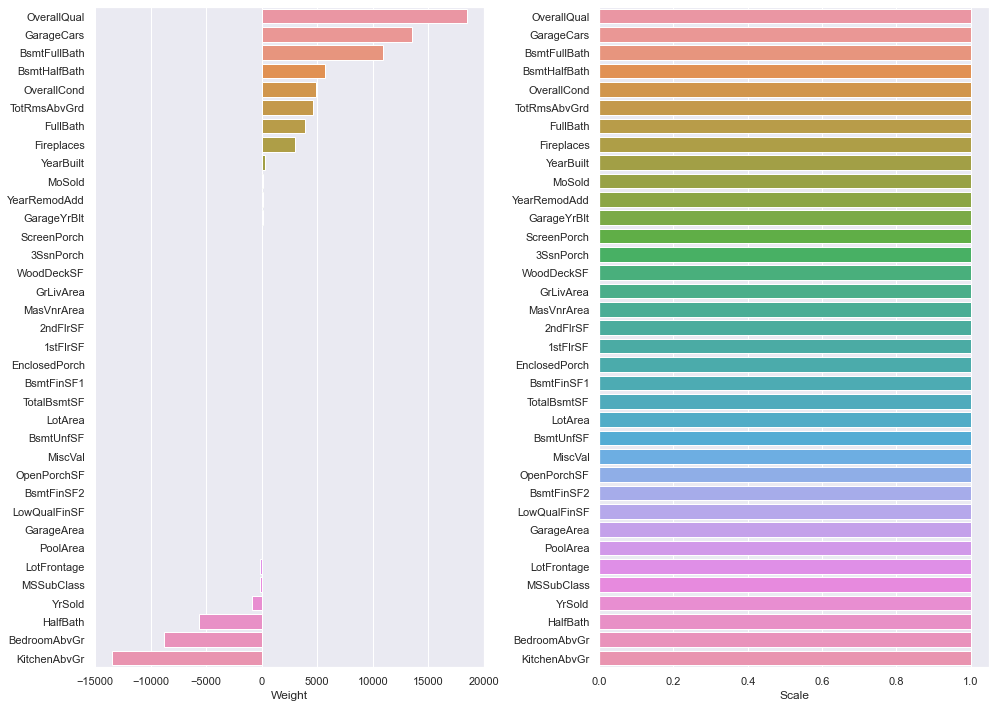

In [17]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, regressions['Linear regression'].coef_, scales)

In [18]:
pd.DataFrame(X_train_scaled, columns=numeric_features)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.637138,-0.830815,-0.403687,-0.832137,1.322374,-1.536211,-1.693863,-0.571109,0.089078,-0.272009,...,-0.131383,-0.763658,-0.718645,1.457220,-0.120091,2.066933,-0.069273,0.966329,0.249209,-1.398058
1,-0.872425,0.382608,-0.004215,-0.832137,0.402383,-0.612735,-1.548422,-0.571109,-0.041272,0.926265,...,-0.965581,-0.237065,-0.718645,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,1.712956,0.885610
2,0.068721,1.336013,0.312690,1.354094,-0.517607,1.102291,1.021023,1.465174,-0.955862,-0.272009,...,1.736294,1.151225,1.608545,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,1.712956,-1.398058
3,0.068721,0.382608,0.187291,-0.103393,-0.517607,0.838441,0.584702,-0.571109,0.031382,-0.272009,...,0.577685,2.451749,1.004080,2.638661,-0.120091,-0.268873,-0.069273,0.590467,-0.482664,0.124388
4,0.068721,-0.007421,0.364725,-0.103393,-0.517607,-0.019072,-0.675780,0.779268,-0.066915,-0.272009,...,0.077167,-0.763658,0.278722,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,-0.116727,-1.398058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,3.127446,-0.440786,0.010475,-0.103393,1.322374,-2.195837,0.730143,-0.571109,-0.955862,-0.272009,...,0.897461,-0.763658,-0.340854,3.075632,-0.120091,-0.268873,-0.069273,-0.092919,-0.848601,0.124388
1018,0.068721,0.642628,0.037290,0.625350,-0.517607,1.135273,1.021023,-0.571109,-0.955862,-0.272009,...,-0.177727,-0.763658,-0.718645,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,0.249209,-0.636835
1019,0.068721,-0.137430,0.377557,2.082837,-0.517607,1.201235,1.117984,0.865006,1.886204,-0.272009,...,1.759466,0.241656,0.278722,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,1.712956,0.124388
1020,0.304008,-0.874152,-0.148818,0.625350,3.162354,-1.701118,0.148381,-0.571109,0.377559,-0.272009,...,-0.715322,-0.763658,-0.718645,-0.355401,-0.120091,-0.268873,-0.069273,-0.092919,0.249209,0.885610


In [19]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(Lasso(), {'alpha': np.arange(-7, 7, 0.1)}, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'alpha': 6.899999999999951}
0.7132581365549217
Lasso(alpha=6.899999999999951)


In [20]:
grid_search = GridSearchCV(Ridge(), {'alpha': np.arange(-7, 7, 0.1)}, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'alpha': 6.899999999999951}
0.7145815871230324
Ridge(alpha=6.899999999999951)


In [21]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
from sklearn.pipeline import Pipeline


pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=6.9))])
pipe.fit(X_train[numeric_features], y_train)
print(f'train rmse: {rmse(y_train, pipe.predict(X_train[numeric_features]))}')
print(f'train r2 score: {r2_score(y_train, pipe.predict(X_train[numeric_features]))}')
print(f'test rmse: {rmse(y_test, pipe.predict(X_test[numeric_features]))}')
print(f'test r2 score: {r2_score(y_test, pipe.predict(X_test[numeric_features]))}')

train rmse: 35624.68008226688
train r2 score: 0.8045865207351927
test rmse: 32042.144716197607
test r2 score: 0.8247481828618


In [22]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [23]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1283,RL,Pave,NotGiven,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,...,NotGiven,NotGiven,NotGiven,NotGiven,Y,NotGiven,NotGiven,NotGiven,WD,Normal
347,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
753,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
624,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
538,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [24]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


column_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical)
])

column_transformer.fit(X_train)
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 294)


In [25]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
pipeline = Pipeline([
    ('transformer', column_transformer),
    ('ridge', Ridge())])
lasso_pipeline = Pipeline([
    ('transformer', column_transformer),
    ('lasso', Lasso())])

pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 

In [26]:
print('ridge train score:', pipeline.score(X_train, y_train))
print('ridge test score:', pipeline.score(X_test, y_test))
print('lasso train score:', lasso_pipeline.score(X_train, y_train))
print('lasso test score:', lasso_pipeline.score(X_test, y_test))

ridge train score: 0.921779831490738
ridge test score: 0.8820887217380236
lasso train score: 0.9356839818387286
lasso test score: 0.8803828192109292


In [27]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 27


In [28]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
pipeline = Pipeline([
    ('transformer', column_transformer),
    ('ridge', Ridge())])
lasso_pipeline = Pipeline([
    ('transformer', column_transformer),
    ('lasso', Lasso())])

In [29]:
grid_search_ridge = GridSearchCV(
    pipeline,
    [{'ridge__alpha': np.arange(-5, 5)}],
    cv=5, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)
print(grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)

{'ridge__alpha': 4}
0.7628744155557651


In [30]:
grid_search_lasso = GridSearchCV(
    lasso_pipeline,
    [{'lasso__alpha': np.arange(-5, 5)}],
    cv=5, n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)


{'lasso__alpha': 1}
0.7253156023558234


In [31]:
model = pipeline = Pipeline([
    ('transformer', column_transformer),
    ('ridge', Ridge(alpha=4))])
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 

In [32]:
print('rmse train', rmse(model.predict(X_train), y_train))
print('rmse test', rmse(model.predict(X_test), y_test))

rmse train 24422.360583677386
rmse test 26021.396457001643


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

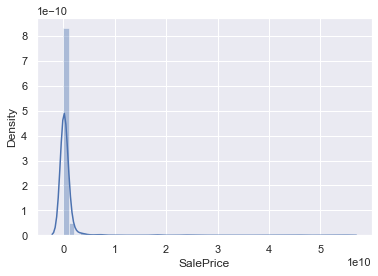

In [33]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [34]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
mask = error < error.quantile(0.95)
mask

912     True
373     True
20      True
800     True
152     True
        ... 
1393    True
1344    True
527     True
1149    True
1289    True
Name: SalePrice, Length: 1022, dtype: bool

In [35]:
model = Pipeline([
    ('transformer', column_transformer),
    ('ridge', Ridge(alpha=4))])
model.fit(X_train[mask], y_train[mask])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

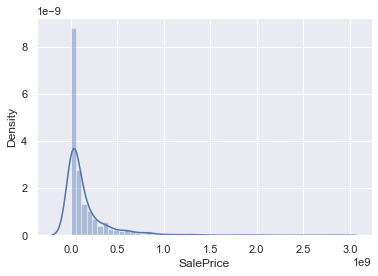

In [36]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

In [37]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
print('rmse train', rmse(model.predict(X_train[mask]), y_train[mask]))
print('r2 train', r2_score(model.predict(X_train[mask]), y_train[mask]))
print('rmse test', rmse(model.predict(X_test), y_test))
print('r2 test', r2_score(model.predict(X_test), y_test)) 

rmse train 12472.867191310776
r2 train 0.9649459402936085
rmse test 23234.635080138403
r2 test 0.892450040801135
